# 2. Glucólisis

La glucólisis es un proceso metabólico fundamental de los seres vivos, mediante el cual obtienen energía descomponiendo azúcar. Un modelo matemático de una de las reacciones involucradas es el siguiente:

\begin{align}
\dot{x}(t) &= -x + ay + x^2y \equiv f(x, y), \\
\dot{y}(t) &= \frac{1}{2} - ay - x^2y \equiv g(x, y),
\end{align}

donde $x(t)$ es la concentración de ADP, $y(t)$ es la de la glucosa-6-fosfato y $a \geq 0$ es un parámetro de la cinética química.

a)  Muestre que hay un único equilibrio (encuéntrelo).

b)  Para $a = \frac{1}{2}$, grafique las nulclinas en el espacio de fases e identifique las regiones donde $f > 0$, $f < 0$, $g > 0$ y $g < 0$. En cada una de estas regiones, indique cualitativamente la dirección del flujo.

c) Analice la estabilidad lineal del equilibrio.

d) Considerando $a$ como un parámetro de control, muestre que existe una bifurcación. Dibuje cualitativamente el flujo en la proximidad del punto fijo para $a < a_c$ y $a > a_c$ ($a_c$ es el valor del parámetro de control donde se produce la bifurcación).

e) Bonus: sabiendo que hay sólo un equilibrio y que las concentraciones no divergen al infinito, explique si existen ciclos de concentración (soluciones periódicas) para algún valor del parámetro $a$.

# Nulclinas para $a=\frac{1}{2}$.

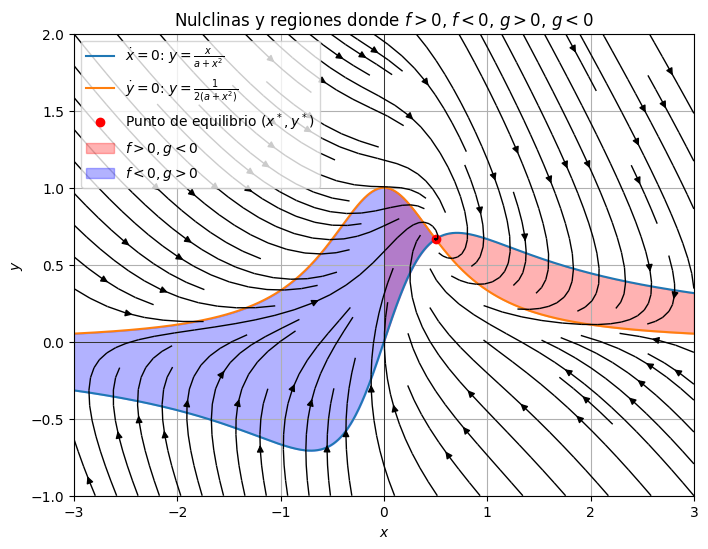

In [13]:
import numpy as np
import matplotlib.pyplot as plt

a = 1/2

# Define the range for x
x = np.linspace(-3, 3, 1000)
y = np.linspace(-1, 2, 400)

# Define the nulclines
y1 = x / (a + x**2)
y2 = 1 / (2 * (a + x**2))

# Equilibrium point
x_star = 1/2
y_star = 2 / (4 * a + 1)

# Plot the nulclines
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
plt.plot(x, y2, label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')

# Plot the equilibrium point
plt.plot(x_star, y_star, 'ro', label='Punto de equilibrio $(x^*, y^*)$')

# Fill regions
plt.fill_between(x, y1, y2, where=(y1 >= 0), color='red', alpha=0.3, label='$f > 0, g < 0$')
plt.fill_between(x, y1, y2, where=(y1 <= y2), color='blue', alpha=0.3, label='$f < 0, g > 0$')

# Crear la malla de puntos
X, Y = np.meshgrid(x, y)

# Definir las funciones
f = -X + a*Y + X**2*Y
g = 1/2 - a*Y - X**2*Y

# Calcular las nulclinas
y1 = X / (a + X**2)
y2 = 1 / (2 * (a + X**2))

plt.streamplot(X, Y, f, g, color='k', linewidth=1)

# Axes and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Nulclinas y regiones donde $f > 0$, $f < 0$, $g > 0$, $g < 0$')
plt.grid(True)
plt.show()



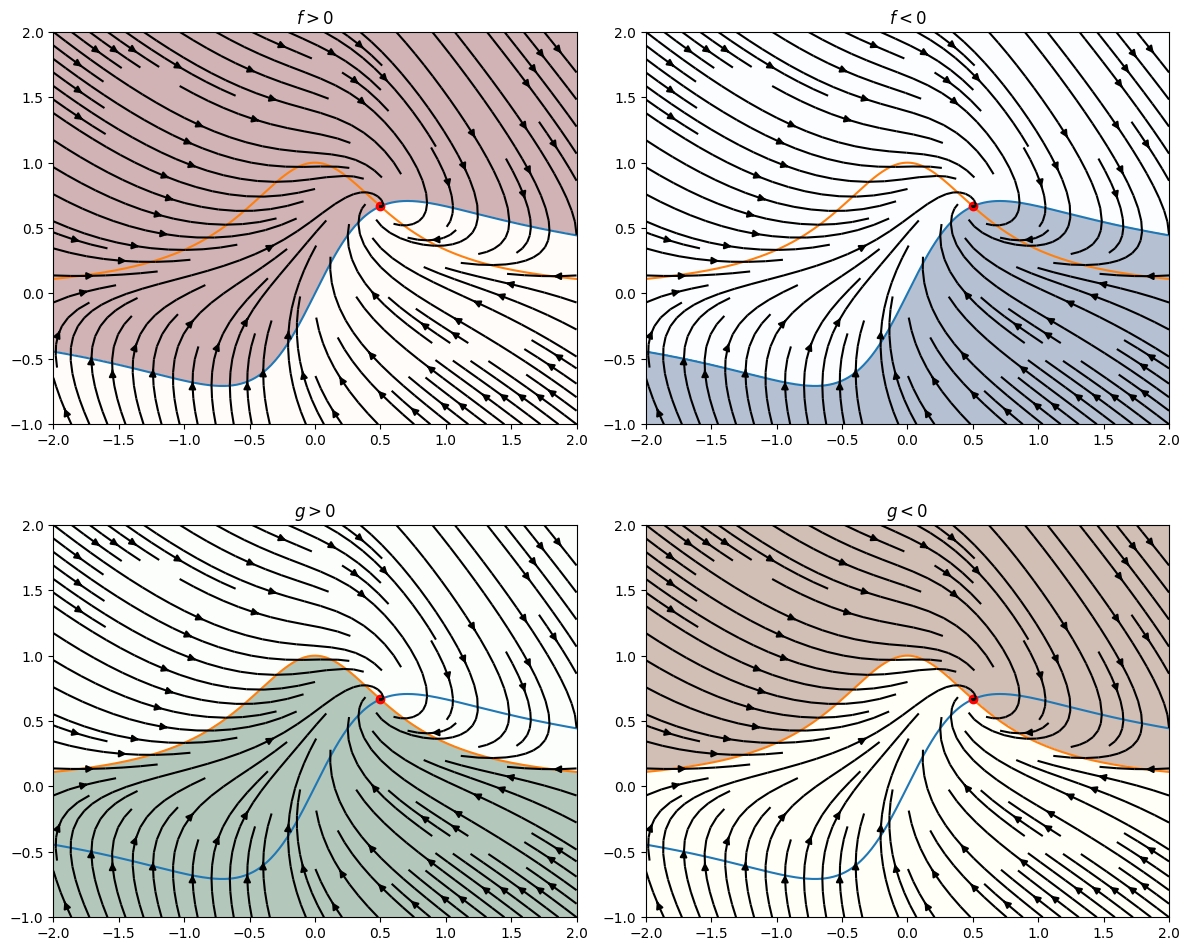

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el parámetro
a = 1/2

# Definir el rango para x y y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 2, 400)

# Crear la malla de puntos
X, Y = np.meshgrid(x, y)

# Definir las funciones
f = -X + a*Y + X**2*Y
g = 1/2 - a*Y - X**2*Y

# Calcular las nulclinas
y1 = X / (a + X**2)
y2 = 1 / (2 * (a + X**2))

# Punto de equilibrio
x_star = 1/2
y_star = 2 / (4 * a + 1)

# Crear una figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot para f > 0
ax[0, 0].imshow(f > 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Reds')
ax[0, 0].set_title('$f > 0$')
ax[0, 0].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[0, 0].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[0, 0].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[0, 0].streamplot(X, Y, f, g, color='k')

# Plot para f < 0
ax[0, 1].imshow(f < 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Blues')
ax[0, 1].set_title('$f < 0$')
ax[0, 1].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[0, 1].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[0, 1].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[0, 1].streamplot(X, Y, f, g, color='k')

# Plot para g > 0
ax[1, 0].imshow(g > 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Greens')
ax[1, 0].set_title('$g > 0$')
ax[1, 0].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[1, 0].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[1, 0].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[1, 0].streamplot(X, Y, f, g, color='k')

# Plot para g < 0
ax[1, 1].imshow(g < 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='YlOrBr')
ax[1, 1].set_title('$g < 0$')
ax[1, 1].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[1, 1].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[1, 1].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[1, 1].streamplot(X, Y, f, g, color='k')

plt.tight_layout()
plt.show()


# 3. Osciladores acoplados

Resuelva numéricamente el sistema de osciladores de fase acoplados:
\begin{equation}
    \dot{\theta_i} = \omega_i + \frac{k}{N} \sum_{j=1}^N sin(\theta_j − \theta_i),
\end{equation}
para $N \approx 5$ osciladores. Grafique la fase y la frecuencia de todos ellos en función del tiempo, y verifique que, para cada conjunto de frecuencias naturales $\omega_i$, un acoplamiento $k$ suficientemente fuerte produce la sincronización de frecuencias. Verifique, cambiando las frecuencias naturales, que la frecuencia de sincronización es el promedio de las frecuencias naturales.

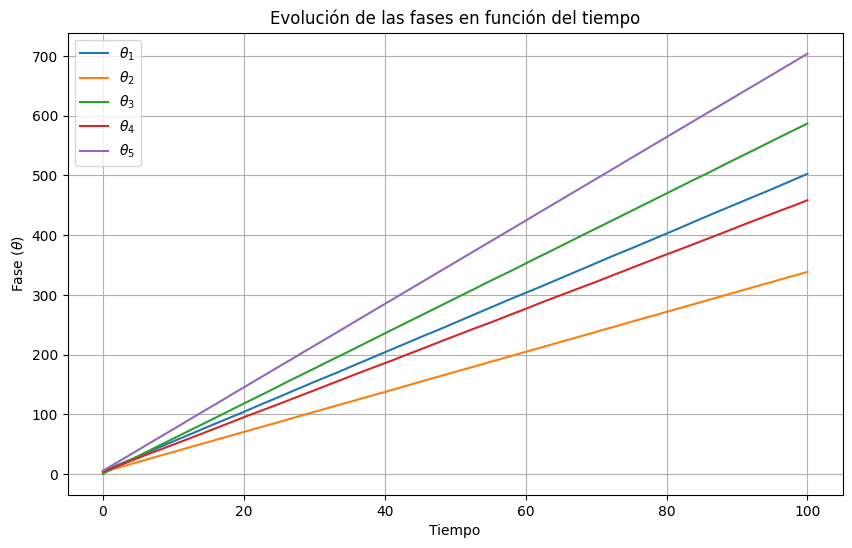

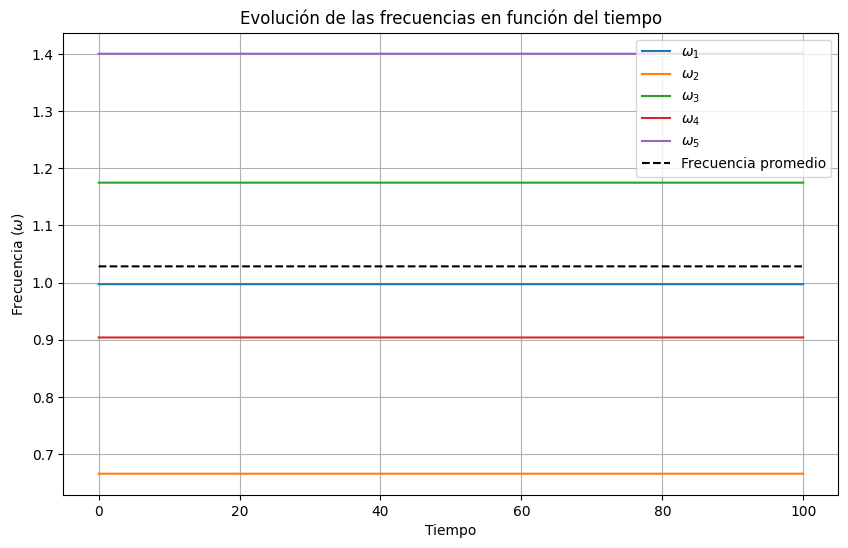

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
N = 5  # Número de osciladores
omega = np.random.uniform(0.5, 1.5, N)  # Frecuencias naturales aleatorias
k = 0.5  # Parámetro de acoplamiento

# Definición de la derivada de theta_i
def dtheta_dt(theta, t):
    dtheta = np.zeros(N)
    for i in range(N):
        for j in range(N):
            dtheta[i] += omega[i] + (k / N) * np.sin(theta[j] - theta[i])
    return dtheta

# Método de Runge-Kutta de cuarto orden para integración numérica
def runge_kutta_step(theta, t, dt):
    k1 = dt * dtheta_dt(theta, t)
    k2 = dt * dtheta_dt(theta + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * dtheta_dt(theta + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * dtheta_dt(theta + k3, t + dt)
    return theta + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Condiciones iniciales
theta_0 = np.random.uniform(0, 2*np.pi, N)

# Parámetros de integración
t_max = 100
dt = 0.01
num_steps = int(t_max / dt)

# Integración numérica
theta_t = np.zeros((num_steps, N))
theta_t[0] = theta_0
for i in range(1, num_steps):
    theta_t[i] = runge_kutta_step(theta_t[i-1], i*dt, dt)

# Graficar las fases en función del tiempo
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.arange(num_steps) * dt, theta_t[:, i], label=f'$\\theta_{i+1}$')
plt.xlabel('Tiempo')
plt.ylabel('Fase ($\\theta$)')
plt.title('Evolución de las fases en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Calcular las frecuencias promedio
omega_promedio = np.mean(omega)

# Graficar las frecuencias en función del tiempo
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.arange(num_steps) * dt, omega[i] * np.ones(num_steps), label=f'$\\omega_{i+1}$')
plt.plot(np.arange(num_steps) * dt, omega_promedio * np.ones(num_steps), 'k--', label='Frecuencia promedio')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia ($\\omega$)')
plt.title('Evolución de las frecuencias en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()
